In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('../input/nlp-getting-started/train.csv')

In [3]:
test=pd.read_csv('../input/nlp-getting-started/test.csv')

In [4]:
sample=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
train.shape

(7613, 5)

In [9]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


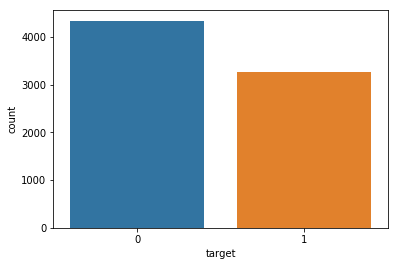

In [10]:
target = train['target']
sns.countplot(target)
train.drop(['target'], inplace =True,axis =1)

In [11]:
def concat_df(train, test):
    return pd.concat([train, test], sort=True).reset_index(drop=True)


In [12]:
df_all = concat_df(train, test)
print(train.shape)
print(test.shape)
print(df_all.shape)

(7613, 4)
(3263, 4)
(10876, 4)


In [13]:
df_all.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
sentences = train['text']

train_size = int(7613*0.8)
train_sentences = sentences[:train_size]
train_labels = target[:train_size]

test_sentences = sentences[train_size:]
test_labels = target[train_size:]


vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 160,253
Trainable params: 160,253
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 10

In [18]:
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [19]:
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels))

Train on 6090 samples, validate on 1523 samples
Epoch 1/10
6090/6090 [==============================] - 2s 279us/sample - loss: 0.6805 - accuracy: 0.5737 - val_loss: 0.6908 - val_accuracy: 0.5345
Epoch 2/10
6090/6090 [==============================] - 1s 126us/sample - loss: 0.6672 - accuracy: 0.5793 - val_loss: 0.6693 - val_accuracy: 0.5338
Epoch 3/10
6090/6090 [==============================] - 1s 126us/sample - loss: 0.6248 - accuracy: 0.6635 - val_loss: 0.6149 - val_accuracy: 0.6888
Epoch 4/10
6090/6090 [==============================] - 1s 129us/sample - loss: 0.5452 - accuracy: 0.7719 - val_loss: 0.5599 - val_accuracy: 0.7420
Epoch 5/10
6090/6090 [==============================] - 1s 132us/sample - loss: 0.4700 - accuracy: 0.8056 - val_loss: 0.5093 - val_accuracy: 0.7708
Epoch 6/10
6090/6090 [==============================] - 1s 129us/sample - loss: 0.4121 - accuracy: 0.8371 - val_loss: 0.4833 - val_accuracy: 0.7827
Epoch 7/10
6090/6090 [==============================] - 1s 132us

In [20]:
def plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


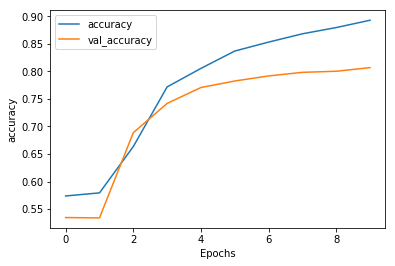

In [21]:
plot(history, "accuracy") 

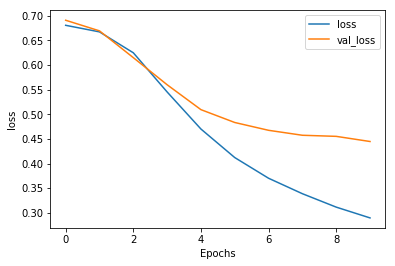

In [22]:
plot(history, 'loss')

In [23]:
tokenizer_1 = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer_1.fit_on_texts(train['text'])

word_index = tokenizer_1.word_index
sequences = tokenizer_1.texts_to_sequences(train['text'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

true_test_sentences = test['text']
testing_sequences = tokenizer_1.texts_to_sequences(true_test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [24]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [25]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [26]:
target = np.asarray(target)

In [27]:
num_epochs = 20
history = model_2.fit(padded, target, epochs=num_epochs, verbose=2)

Train on 7613 samples
Epoch 1/20
7613/7613 - 2s - loss: 0.6803 - accuracy: 0.5703
Epoch 2/20
7613/7613 - 1s - loss: 0.6411 - accuracy: 0.6339
Epoch 3/20
7613/7613 - 1s - loss: 0.5324 - accuracy: 0.7716
Epoch 4/20
7613/7613 - 1s - loss: 0.4425 - accuracy: 0.8145
Epoch 5/20
7613/7613 - 1s - loss: 0.3844 - accuracy: 0.8458
Epoch 6/20
7613/7613 - 1s - loss: 0.3429 - accuracy: 0.8630
Epoch 7/20
7613/7613 - 1s - loss: 0.3125 - accuracy: 0.8738
Epoch 8/20
7613/7613 - 1s - loss: 0.2867 - accuracy: 0.8894
Epoch 9/20
7613/7613 - 1s - loss: 0.2640 - accuracy: 0.8982
Epoch 10/20
7613/7613 - 1s - loss: 0.2452 - accuracy: 0.9090
Epoch 11/20
7613/7613 - 1s - loss: 0.2272 - accuracy: 0.9141
Epoch 12/20
7613/7613 - 1s - loss: 0.2155 - accuracy: 0.9195
Epoch 13/20
7613/7613 - 1s - loss: 0.2018 - accuracy: 0.9245
Epoch 14/20
7613/7613 - 1s - loss: 0.1879 - accuracy: 0.9317
Epoch 15/20
7613/7613 - 1s - loss: 0.1760 - accuracy: 0.9351
Epoch 16/20
7613/7613 - 1s - loss: 0.1631 - accuracy: 0.9405
Epoch 17/20

In [28]:
output = model_2.predict(testing_padded)

In [29]:
predicted =  pd.DataFrame(output, columns=['target'])

In [30]:
final_output = []
for val in predicted.target:
    if val > 0.5:
        final_output.append(1)
    else:
        final_output.append(0)


In [31]:
sample['target'] = final_output

sample.to_csv("submission_1.csv", index=False)
sample.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
